### This notebook runs with a previous version of the data (Nov 18th, 2019)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use("seaborn-whitegrid")
plt.rc('ps',fonttype = 42)
plt.rc('pdf',fonttype = 42)
plt.rcParams.update({'font.size': 20})
plt.rcParams['ps.useafm'] = True
#plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
texts_df = pd.read_pickle("data/processed/texts.p")

# Extract works

In [3]:
works_cnt = pd.Series()
for works in texts_df["works"]:
    for work in works:
        if works.get(work).get('norm') == "":
            if work not in works_cnt:
                works_cnt[work] = 1
            else:
                works_cnt[work] += 1
        else:
            if works.get(work).get('norm') not in works_cnt:
                works_cnt[works.get(work).get('norm')] = 1
            else:
                works_cnt[works.get(work).get('norm')] += 1
print('Number of unique works: ' + str(len(works_cnt)))
print('Number of works occurring more than once: ' + str(len(works_cnt[works_cnt>1])))
print('Number of works occurring more than 5 times: ' + str(len(works_cnt[works_cnt>5])))

Number of unique works: 1352
Number of works occurring more than once: 279
Number of works occurring more than 5 times: 47


In [4]:
works_cnt.sort_index().to_csv('worksnames.csv')

/home/bgeiger/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [5]:
texts_df.loc[texts_df.journal_title=='Le Spectateur français ou le Nouveau Socrate moderen','journal_title']='Le Spectateur français ou le Nouveau Socrate moderne'
texts_df.loc[texts_df.journal_title=='Le Spectateur françois ou le Nouveau Socrate moderne','journal_title']='Le Spectateur français ou le Nouveau Socrate moderne'
texts_df.loc[texts_df.journal_title=='Le Spectateur français ou le Nouveau Socrate moderne','journal_title']='Le Spectateur français ou le Nouveau Socrate moderne'
texts_df.loc[texts_df.journal_title=='Gazzetta urbana \t\t\t\t\t\tveneta','journal_title']='Gazzetta urbana veneta'
texts_df.loc[texts_df.journal_title=='Gazzetta urbana veneta','journal_title']='Gazzetta urbana veneta'
texts_df.loc[texts_df.journal_title=='Le Spectateur français ou Journal des Mœurs','journal_title']='Le Spectateur français ou Journal des Mœurs'
texts_df.loc[texts_df.journal_title=='Le Spectateur français, ou Journal des moeurs','journal_title']='Le Spectateur français ou Journal des Mœurs'
texts_df = texts_df.drop(texts_df[texts_df.journal_title=='missing'].index)
for journal_name in sorted(set(texts_df.journal_title.unique())):
    print(journal_name)
    
print('\nNumber of Journals: '+str(len(texts_df.journal_title.unique())))

Der Bürger
Der Zuschauer
Die Zuschauerin
Donna galante
El Amigo y Corresponsal del Censor
El Apologista Universal
El Argonauta Español
El Belianis literario
El Catón Compostelano
El Censor
El Corresponsal del Apologista
El Corresponsal del Censor
El Curioso Entretenido
El Duende Crítico
El Duende de Madrid
El Duende especulativo sobre la vida civil
El Escritor sin Titulo
El Filosofo à la Moda
El Juzgado Casero
El Murmurador imparcial
El Observador
El Pensador
El Regañón general
El Teniente del Apologista
Gazzetta urbana veneta
Gli Osservatori veneti
Il Caffè
Il Filosofo alla Moda
Il Socrate Veneto
L'Indigent philosophe ou l'homme sans souci
La Bagatelle
La Bigarure
La Frusta letteraria di Aristarco Scannabue
La Gazzetta Veneta
La Pensadora Gaditana
La Pensatriz salmantina
La Spectatrice
La Spectatrice danoise
La Spectatrice. Ouvrage traduit de l'anglois
La Spettatrice
Le Cabinet du Philosophe
Le Censeur ou Caractères des Mœurs de la Haye
Le Mentor moderne
Le Misantrope
Le Monde
Le Mond

In [6]:
import csv
with open('journal_dictionary_200113.csv', mode='r') as infile:
    reader = csv.reader(infile,delimiter=';')
    mydict = {rows[0]:rows[1] for rows in reader}

In [7]:
new_works_cnt=works_cnt.rename(mydict)

In [8]:
new_works_cnt=new_works_cnt.groupby(new_works_cnt.index).sum()
print('Number of unique mentioned journal names: ' + str(len(new_works_cnt)))
print('Number of journal names occurring more than once: ' + str(len(new_works_cnt[new_works_cnt>1])))
print('Number of journal names occurring more than 5 times: ' + str(len(new_works_cnt[new_works_cnt>5])))

Number of unique mentioned journal names: 29
Number of journal names occurring more than once: 23
Number of journal names occurring more than 5 times: 12


In [9]:
works_df=texts_df
works_short=new_works_cnt
for work in works_short.index:
    #print(work)
    works_df[work]=0
    if not work in mydict:
        mydict[work]=work
for row in range(len(works_df)):
    #print(works_df['works'].iloc[row])
    for work in works_df['works'].iloc[row]:
        #print(work)
        if works_df['works'].iloc[row].get(work).get('norm') == "":
            if mydict.get(work) in set(works_short.index):
                works_df.loc[works_df.index[row],mydict.get(work)]=1
        else:
            if mydict.get(works_df['works'].iloc[row].get(work).get('norm')) in set(works_short.index):
                works_df.loc[works_df.index[row],mydict.get(works_df['works'].iloc[row].get(work).get('norm'))]=1
            
        
                
reduced_works_df=works_df.groupby('journal_title').sum()#[['journal_title','language'] + list(works_short.index)]
reduced_works_df=reduced_works_df.drop(labels='',axis=1)

In [10]:
import networkx as nx
import numpy as np

In [11]:
for journal in set(list(reduced_works_df.columns)+list(reduced_works_df.index)):
    if journal not in reduced_works_df.columns:
        reduced_works_df[journal]=0
    if journal not in reduced_works_df.index:
        reduced_works_df.loc[journal]=0

In [12]:
reduced_works_df

,El Catón Compostelano,El Curioso Entretenido,El Filosofo à la Moda,El Pensador,El Regañón general,La Bagatelle,La Gazeta Española,La Gazzetta Veneta,La Pensadora Gaditana,La Spectatrice,...,Leipziger Spectateur,El Escritor sin Titulo,Der Zuschauer,Le Cabinet du Philosophe,Der Bürger,Le Monde,Il Caffè,El Duende de Madrid,El Argonauta Español,Le Spectateur moderne
journal_title,,,,,,,,,,,,,,,,,,,,,
Der Bürger,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Der Zuschauer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Die Zuschauerin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Donna galante,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
El Amigo y Corresponsal del Censor,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Le Spectateur François ou le Nouveau Socrate Moderne.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
The Guardian,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Le Spectateur François ou Journal des moeurs,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


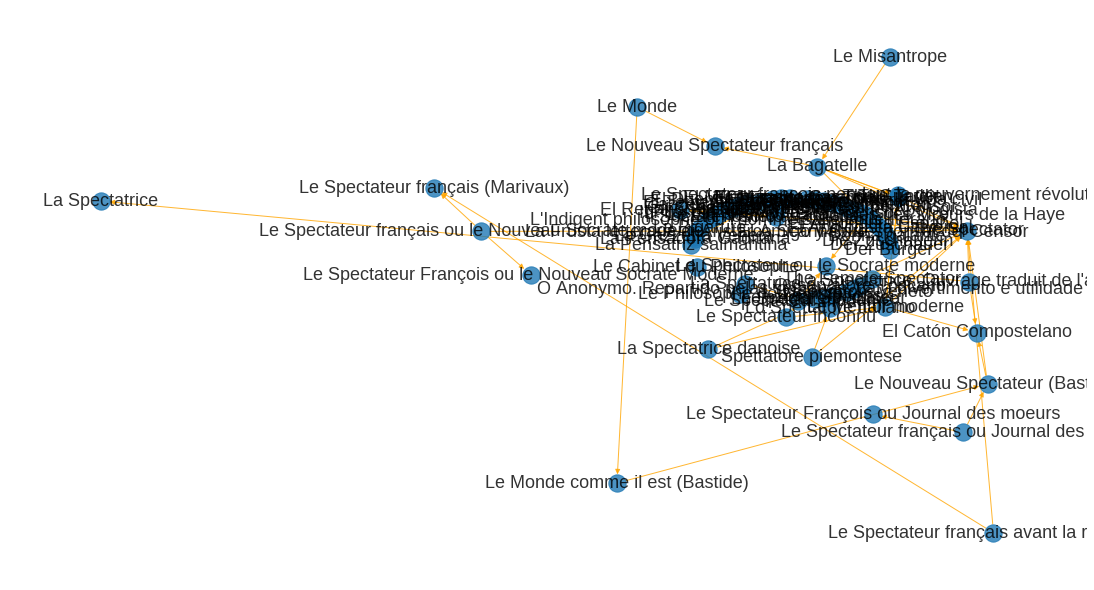

In [13]:
G = nx.from_pandas_adjacency(reduced_works_df,create_using=nx.DiGraph())
plt.figure(figsize=(15,8))
nx.draw_kamada_kawai(G,with_labels=True,font_size=18,font_color='k',edge_color='orange',alpha=0.8)
plt.show()

In [14]:
len(G.nodes)

72

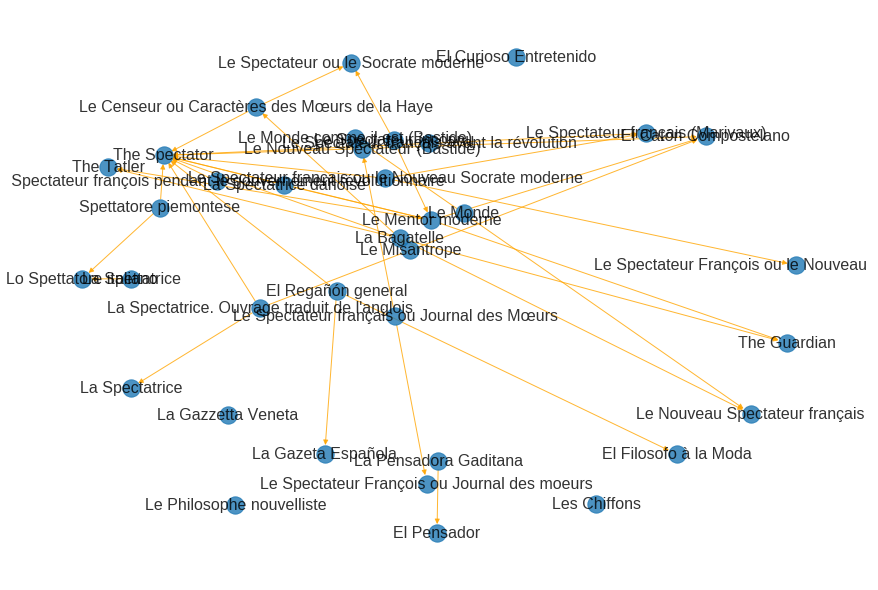

In [15]:
A=G
A.remove_nodes_from(list(nx.isolates(G)))
plt.figure(figsize=(12,8))
nx.draw_spring(A,with_labels=True,font_size=16,font_color='k',edge_color='orange',alpha=0.8)
plt.show()

In [16]:
B=nx.MultiDiGraph()
B.add_nodes_from(A);
B.add_edges_from(A.edges,color='orange',weight=1);

B.add_edge('The Spectator','Le Spectateur français ou le Nouveau Socrate moderne',color='red', weight=3)
B.add_edge('The Spectator','Der Zuschauer',color='red', weight=3)
B.add_edge('Le Spectateur français ou le Nouveau Socrate moderne','Il Filosofo alla Moda',color='red', weight=3)
B.add_edge('Il Filosofo alla Moda','El Filosofo à la Moda',color='red', weight=3)

B.add_edge('The Female Spectator','Die Zuschauerin',color='red', weight=3)
B.add_edge('The Female Spectator','La Spectatrice. Ouvrage traduit de l\'anglois',color='red', weight=3)
B.add_edge('The Female Spectator','La Spettatrice',color='red', weight=3)

B.add_edge('The Tatler','Le Philosophe nouvelliste',color='red', weight=3)

B.add_edge('The Guardian','Le Mentor moderne',color='red', weight=3)

0

In [17]:
works_to_language=works_df[['journal_title','language']].drop_duplicates()
works_to_language=works_to_language.append({'journal_title':'The Tatler','language':'English'},ignore_index=True)
works_to_language=works_to_language.append({'journal_title':'The Guardian','language':'English'},ignore_index=True)
works_to_language=works_to_language.append({'journal_title':'The Spectator','language':'English'},ignore_index=True)
works_to_language=works_to_language.append({'journal_title':'La Gazeta Española','language':'Spanish; Castilian'},ignore_index=True)
works_to_language=works_to_language.append({'journal_title':'Le Spectateur François ou Journal des moeurs','language':'French'},ignore_index=True)
works_to_language=works_to_language.append({'journal_title':'Le Spectateur François ou le Nouveau Socrate Moderne.','language':'French'},ignore_index=True)

language_to_color={'French':'red','English':'blue','Italian':'green','Spanish; Castilian':'brown','German':'cyan'}


works_to_language=works_to_language.replace({'language':language_to_color})

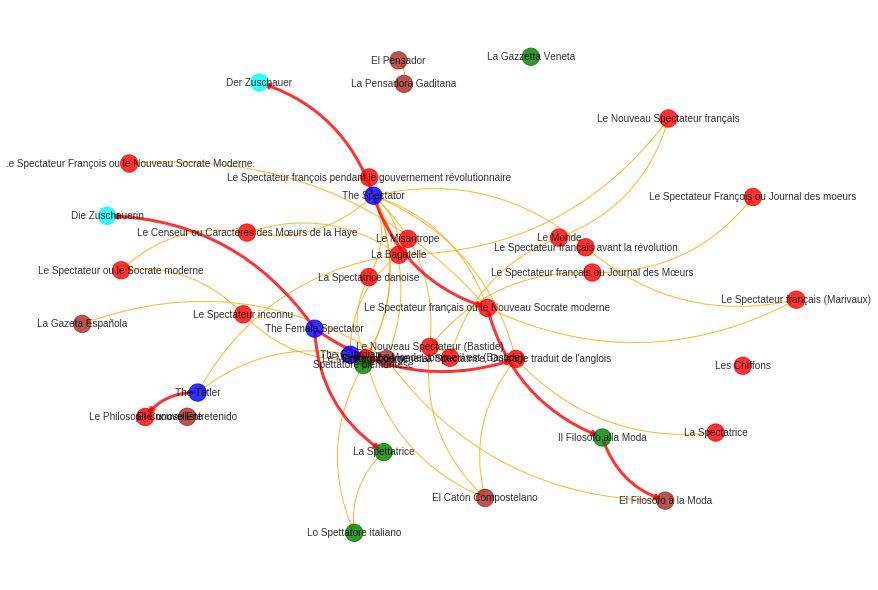

In [18]:
edges = B.edges()

colors = []
weights = []

for (u,v,attrib_dict) in list(B.edges.data()):
    colors.append(attrib_dict['color'])
    weights.append(attrib_dict['weight'])

node_color=[]
for n in list(B.nodes):
    node_color.append(works_to_language.loc[works_to_language['journal_title']==n]['language'].values[0])
    B.nodes[n]['color']=works_to_language.loc[works_to_language['journal_title']==n]['language'].values[0]

#nx.set_node_attributes(B, node_color, 'color')

plt.figure(figsize=(12,8))
pos=nx.spring_layout(B)
nx.draw(B,pos=pos,with_labels=True,font_size=10,font_color='k',alpha=0.8,edgelist=[],node_color=node_color)
nx.draw_networkx_edges(B, pos,node_size=50,edge_color=colors,width=weights,alpha=0.8,connectionstyle='arc3,rad=.25')
plt.show()

In [19]:
A = nx.nx_agraph.to_agraph(G)

In [20]:
from pygraphviz import *
A.draw('journal2journal.eps',prog='fdp')

/home/bgeiger/anaconda3/lib/python3.6/site-packages/pygraphviz/agraph.py:1367: RuntimeWarning: Warning: UTF-8 input uses non-Latin1 characters which cannot be handled by this PostScript driver

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


In [21]:
nx.write_gexf(G, "test.gexf")

## Real Connections between Journals

In [22]:
nx.write_gexf(B, "test_b.gexf")